In [1]:
# LIBRARIES

import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import requests
import re                            
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [2]:
pd.set_option('display.max_rows', 100)          
pd.set_option('display.max_columns', 100)      
pd.set_option('display.width', None)             
pd.set_option('display.max_colwidth', 300)       
pd.set_option("display.precision", 6)
pd.set_option('display.pprint_nest_depth', 10)

# Making a request to the website

In [3]:
# CHECKING IF WEBSITE ALLOWS SCRAPING:

import os
print(os.popen("curl https://www.tennismagazin.de/tennis-weltrangliste-herren/robots.txt").read())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="lt-ie9 lt-ie8 lt-ie7" lang="de-DE"> <![endif]-->
<!--[if IE 7]>    <html class="lt-ie9 lt-ie8" lang="de-DE"> <![endif]-->
<!--[if IE 8]>    <html class="lt-ie9" lang="de-DE"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="de-DE"> <!--<![endif]-->
<head>
<script type="text/javascript" src="https://cdn.opencmp.net/tcf-v2/cmp-stub-latest.js" id="open-cmp-stub" data-domain="tennismagazin.de"></script>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<meta charset="UTF-8">
<meta name="viewport" content="width=1435">

<link rel="profile" href="http://gmpg.org/xfn/11">
<link rel="pingback" href="">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<meta name="HandheldFriendly" content="True">
<meta name="apple-touch-fullscreen" content="yes" />
<meta name="MobileOptimized" content="320">
<link rel="pingback" href="">

<link rel="apple-touch-icon" sizes="57x57" href="https://www.tennismagazin.de/content/themes/buck

In [4]:
try:
    url = "https://www.tennismagazin.de/tennis-weltrangliste-damen/"
    response = requests.get(url)
    print("The response that we got back from the URL is", response.status_code)
    
except ValueError:
    print("The response that we got back from the URL is", response.status_code)

The response that we got back from the URL is 200


# Parsing Html

In [5]:
soup = BeautifulSoup(response.text, "html.parser")
html = soup.find_all("div")

In [6]:
soup.title.text

'WTA Tennis Weltrangliste der Damen - tennis MAGAZIN'

In [7]:
soup.p.text

'Die Tennis Weltrangliste der Damen bildet die aktuell besten Tennisspielerinnen der Welt ab. Die von der WTA (Women’s Tennis Association) herausgegebene Weltrangliste wird seit dem Jahr 1975 wöchentlich bzw. während der Grand Slam-Turniere im Zwei-Wochen-Rhythmus aktualisiert. Sie ist das Pendant zur ATP-Rangliste der Herren (Association of Tennis Professionals).'

In [8]:
# FIND THE TABLE:

# getting the table head:
html_thead = soup.find_all("thead")[0]

# getting all the rows (cells) in table head:
html_tr = html_thead.find_all("tr")

# creating a list of the column names:
for i in html_tr:
    # get the table headings
    th = (i.find_all("th"))
    # single values for the list of column names
    headings = [j.text for j in th]

In [9]:
headings

['Rang', 'Veränderung', 'Name', 'Alter', 'Punkte', 'Turniere']

In [10]:
# FIND THE BODY:

# getting the table body:
tbody = soup.table
html_text = tbody.contents

# getting all the rows (cells) in table body:
content = []
# loop through table body
for i in html_text:
    th = i.find_all(["th", "td"])
    row = [j.text.strip() for j in th]
    # removing any spaces
    row = [j.replace(".", "") for j in row]
    content.append(row)

In [11]:
content[:10]

[['Rang', 'Veränderung', 'Name', 'Alter', 'Punkte', 'Turniere'],
 ['1', '', 'Iga Swiatek', '22', '9880', '19'],
 ['2', '', 'Aryna Sabalenka', '25', '8905', '16'],
 ['3', '+1', 'Elena Rybakina', '24', '6811', '18'],
 ['4', '-1', 'Coco Gauff', '19', '6660', '19'],
 ['5', '', 'Jessica Pegula', '29', '5905', '20'],
 ['6', '', 'Ons Jabeur', '29', '4076', '20'],
 ['7', '', 'Marketa Vondrousova', '24', '3966', '16'],
 ['8', '', 'Maria Sakkari', '28', '3770', '24'],
 ['9', '', 'Karolina Muchova', '27', '3590', '14']]

# Data Frame

In [12]:
df_tennis_woman = pd.DataFrame(content[1:], columns=headings)

df_tennis_woman.head(6)

,Rang,Veränderung,Name,Alter,Punkte,Turniere
0,1,,Iga Swiatek,22,9880,19
1,2,,Aryna Sabalenka,25,8905,16
2,3,+1,Elena Rybakina,24,6811,18
3,4,-1,Coco Gauff,19,6660,19
4,5,,Jessica Pegula,29,5905,20
5,6,,Ons Jabeur,29,4076,20


In [13]:
df_tennis_woman.shape

(100, 6)

In [14]:
# Filling empty places "Veränderung" with 0:

def change(x):
    if x == "":
        return 0
    else:
        return x
    
df_tennis_woman["Veränderung"] = df_tennis_woman["Veränderung"].apply(change)   

In [15]:
# Categorical data to numeric

df_tennis_woman.Rang = df_tennis_woman.Rang.astype(int)
df_tennis_woman.Veränderung = df_tennis_woman.Veränderung.astype(int)
df_tennis_woman.Alter = df_tennis_woman.Alter.astype(int)
df_tennis_woman.Punkte = df_tennis_woman.Punkte.astype(int)
df_tennis_woman.Turniere = df_tennis_woman.Turniere.astype(int)

In [16]:
df_tennis_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rang         100 non-null    int32 
 1   Veränderung  100 non-null    int32 
 2   Name         100 non-null    object
 3   Alter        100 non-null    int32 
 4   Punkte       100 non-null    int32 
 5   Turniere     100 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 2.9+ KB


In [17]:
# Changing column names:

df_tennis_woman = df_tennis_woman.rename(columns = {"Rang":"rank", "Veränderung":"ranking_change", "Name":"player", 
                                                    "Alter":"age", "Punkte":"points", "Turniere":"tourn_played"})

In [18]:
df_tennis_woman.head(5)

,rank,ranking_change,player,age,points,tourn_played
0,1,0,Iga Swiatek,22,9880,19
1,2,0,Aryna Sabalenka,25,8905,16
2,3,1,Elena Rybakina,24,6811,18
3,4,-1,Coco Gauff,19,6660,19
4,5,0,Jessica Pegula,29,5905,20


In [19]:
# # EXPORTING DATAFRAME TO CSV:

#df_tennis_woman.to_csv("tennis_woman.csv",index=False)

# VISUALIZATIONS

Text(0.5, 1.0, 'AGE GESAMT')

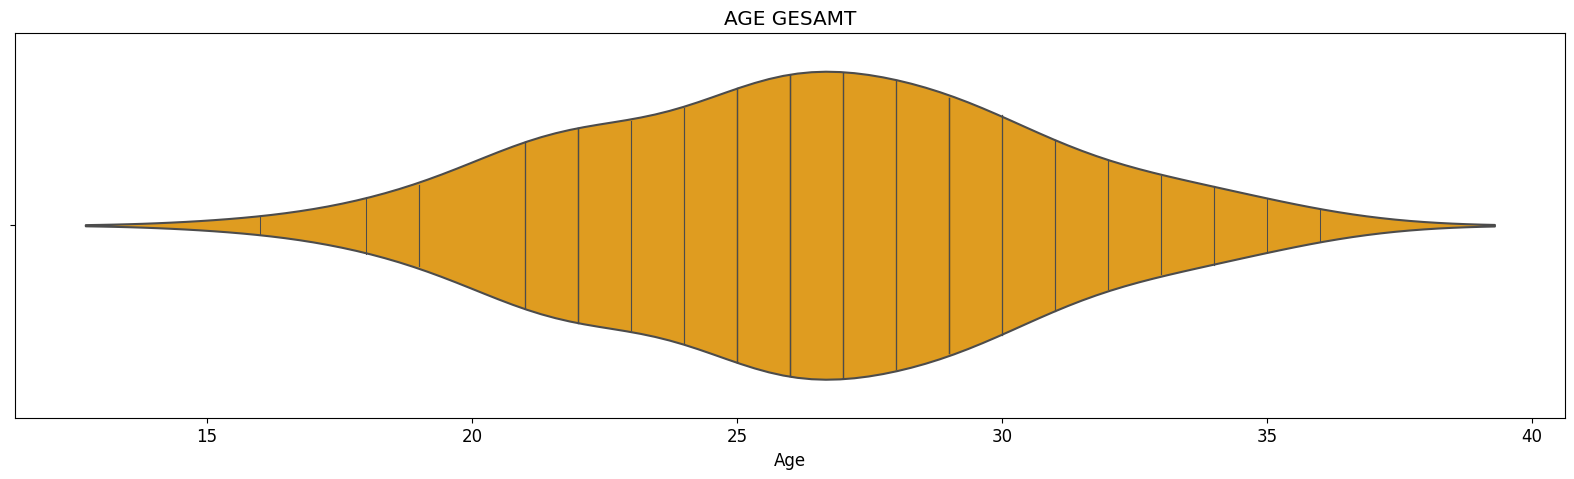

In [20]:
plt.figure(figsize=(20,5))

sns.violinplot(x=df_tennis_woman["age"],inner="stick", color = "orange")
plt.xlabel("Age")
plt.title("AGE GESAMT")

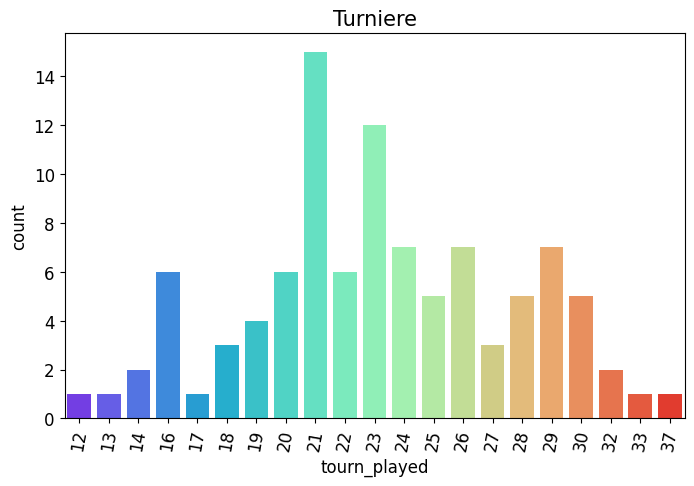

In [21]:
plt.figure(figsize=(8,5))

sns.countplot(x=df_tennis_woman["tourn_played"], palette="rainbow")
plt.title("Turniere", fontsize=15)
plt.xticks(rotation=80)
plt.show()

In [22]:
df_tennis_woman.head(100)

,rank,ranking_change,player,age,points,tourn_played
0,1,0,Iga Swiatek,22,9880,19
1,2,0,Aryna Sabalenka,25,8905,16
2,3,1,Elena Rybakina,24,6811,18
3,4,-1,Coco Gauff,19,6660,19
4,5,0,Jessica Pegula,29,5905,20
5,6,0,Ons Jabeur,29,4076,20
6,7,0,Marketa Vondrousova,24,3966,16
7,8,0,Maria Sakkari,28,3770,24
8,9,0,Karolina Muchova,27,3590,14
9,10,0,Barbora Krejcikova,28,2945,21
